In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df2023_2024 = pd.read_excel("DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx")
df2022_2023 = pd.read_excel("DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx", sheet_name=None)
df2020_2021 = pd.read_excel("DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx", sheet_name=None)


# Parte 1
## A) Dimensión de la base de datos

In [3]:
#Obtener shape de cada dataframe
print("Shape de df2023_2024: ", df2023_2024.shape)
for key in df2022_2023:
    print("Shape de df2022_2023: ", key , df2022_2023[key].shape)
for key in df2020_2021:
    print("Shape de df2020_2021: ", key , df2020_2021[key].shape)


Shape de df2023_2024:  (13872, 240)
Shape de df2022_2023:  SURESTE (14255, 16)
Shape de df2022_2023:  NORESTE (14255, 16)
Shape de df2022_2023:  CENTRO (14255, 16)
Shape de df2022_2023:  NOROESTE (14255, 16)
Shape de df2022_2023:  SUROESTE (14255, 16)
Shape de df2022_2023:  NOROESTE2 (14255, 16)
Shape de df2022_2023:  NORTE (14255, 16)
Shape de df2022_2023:  SUROESTE2 (14255, 16)
Shape de df2022_2023:  SURESTE2 (14255, 16)
Shape de df2022_2023:  SURESTE3 (14255, 16)
Shape de df2022_2023:  SUR (14254, 16)
Shape de df2022_2023:  NORTE2 (14255, 16)
Shape de df2022_2023:  NORESTE2 (14255, 16)
Shape de df2022_2023:  NORESTE3 (14254, 16)
Shape de df2022_2023:  NOROESTE3 (6237, 16)
Shape de df2022_2023:  CATÁLOGO (15, 3)
Shape de df2020_2021:  SURESTE (17538, 16)
Shape de df2020_2021:  NORESTE (17535, 16)
Shape de df2020_2021:  CENTRO (17536, 16)
Shape de df2020_2021:  NOROESTE (17537, 16)
Shape de df2020_2021:  SUROESTE (17537, 16)
Shape de df2020_2021:  NOROESTE2 (17535, 16)
Shape de df2020

# Parte 2
## A) Selecciona el conjunto de datos a utilizar
Decide qué conjunto de datos se utilizará. Explica por qué se incluyeron o excluyeron ciertos datos.
Identifica las columnas objetivo


Bases de datos seleccionadas: Datos historicos 2023-2024, Datos historicos 2022-2023, Datos historicos 2020-2021 y datos históricos 2021.
Estas bases se seleccionaron pues son las más recientes, completas y presentan un formato similar para su análisis. Al ser series de tiempo se pueden juntar entre ellas para hacer un análisis más completo.
Las columnas objetivo seria tener cada columna con el formato "Estación Contaminante (medida)", indexados por su fecha, de manera que se puedan almacenar los datos como una serie de tiempo durante los 4 años.

# Hacer columnas similares para cada base de datos

Preparación de 2023-2024

In [4]:
df2023_2024.loc[0,:] = df2023_2024.loc[0,:].fillna("A") #Se rellena un valor de A para que no haya problemas al juntar las entradas
df2023_2024.columns = df2023_2024.columns.str.split('.').str[0] #Se toma el nombre de la columna sin el .1 o .2
df2023_2024 = df2023_2024.replace("WDV", "WDR") # Se cambia el nombre de la columna WDV a WDR, puesto que en las demas bases de datos es WDR
df2023_2024.columns = (df2023_2024.columns + " " + df2023_2024.loc[0] + " (" + df2023_2024.loc[1] +")").str.upper() #Se junta el nombre de la medida, con la estacion
df2023_2024.drop([0,1], inplace=True) # Se eliminan las filas que contenian los nombres de las columnas
df2023_2024.rename(columns={"UNNAMED: 0 A (DATE)": "FECHA"}, inplace=True) #Se cambia el nombre de la columna de fecha
df2023_2024["FECHA"] = pd.to_datetime(df2023_2024["FECHA"]) # Se convierte la columna de fecha a datetime
#Se cambiar el nombre de las columnas para que coincidan con las demas bases de datos
df2023_2024.columns = df2023_2024.columns.str.replace("SURESTE2", "SURESTE 2")
df2023_2024.columns = df2023_2024.columns.str.replace("NORESTE2", "NORESTE 2")
df2023_2024.columns = df2023_2024.columns.str.replace("SUROESTE2", "SUROESTE 2")

Preparación de 2022-2023

In [5]:
# Se crea un diccionario con los nombres de las columnas de df2022_2023
modified_keys = {}

for key in df2022_2023.keys():
    # Se revisa si la ultima letra de la llave es un digito
    if key[-1].isdigit():
        # Se modifica la llave para que tenga un espacio entre la penultima letra y el ultimo digito
        new_key = key[:-1] + " " + key[-1]
    else:
        # De lo contrario, se deja la llave igual
        new_key = key
    # Y se guarda la llave modificada en el diccionario
    modified_keys[key] = new_key

# Se cambiar el nombre de las columnas de las bases de datos de 2022_2023 con las llaves generadas
df2022_2023 = {modified_keys[key]: df for key, df in df2022_2023.items()}
#Se cambian las unidades para que coincidan con las de df2023_2024
units = {"CO": "(PPM)", "CO2": "(PPM)", "NO": "(PPB)", "NO2": "(PPB)", "NOX": "(PPB)", "O3": "(PPB)", "PM10": "(UG/M3)", "PM2.5": "(UG/M3)", "SO2": "(PPB)", "PRS": "(MMHG)", "RH": "(%)", "TOUT": "(DEGC)", "WSP": "(M/S)", "RAINF": "(MM/HR)", "WD": "(DEG)", "WSR": "(KMPH)", "WDR": "(DEG)", "SR": "(KW/M2)"}
df2022_2023.keys()
for key in df2022_2023.keys():
    # Se agregan las unidades a las columnas que coinciden con las de df2023_2024 
    for column in df2022_2023[key].columns:
        if column in units:
            df2022_2023[key].rename(columns={column: key+ " " + column + " " + units[column]}, inplace=True)
        

#Se junta el diccionario de df2022_2023 en un solo dataframe
from functools import reduce

# Se elimina catalogo de las bases de datos
dfs_to_merge = [df2022_2023[key] for key in df2022_2023 if key != 'CATÁLOGO']

# Se juntan las bases de datos por la columna de fecha
df2022_2023_merged = reduce(lambda left, right: pd.merge(left, right, on='date',how="outer"), dfs_to_merge)

# Se cambia el nombre de la columna de fecha y se cambia el tipo de dato a datetime
df2022_2023_merged.rename(columns={"date": "FECHA"}, inplace=True)
df2022_2023_merged["FECHA"] = pd.to_datetime(df2022_2023_merged["FECHA"])

Preparación de 2021-2022

In [6]:
# Se crea un diccionario con los nombres de las columnas de df2020_2021
modified_keys = {}

for key in df2020_2021.keys():
    # Se revisa si la ultima letra de la llave es un digito
    if key[-1].isdigit():
        # Se modifica la llave para que tenga un espacio entre la penultima letra y el ultimo digito
        new_key = key[:-1] + " " + key[-1]
    else:
        # De lo contrario, se deja la llave igual
        new_key = key
    # Y se guarda la llave modificada en el diccionario
    modified_keys[key] = new_key

# Se cambia el nombre de las columnas de las bases de datos de 2020_2021 con las llaves generadas
df2020_2021 = {modified_keys[key]: df for key, df in df2020_2021.items()}

for key in df2020_2021.keys():
    # Se agregan las unidades a las columnas que coinciden con las de df2023_2024
    for column in df2020_2021[key].columns:
        if column in units:
            df2020_2021[key].rename(columns={column: key + " " + column + " " + units[column]}, inplace=True)


# Se elimina catalogo y noroeste 3 de las bases de datos
dfs_to_merge = [df2020_2021[key] for key in df2020_2021 if key not in ['CATÁLOGO', 'NOROESTE 3']]

# Merge all DataFrames on the 'date' column
df2020_2021_merged = reduce(lambda left, right: pd.merge(left, right, on='date', how="outer"), dfs_to_merge)

# Se cambia el nombre de la columna de fecha y se cambia el tipo de dato a datetime
df2020_2021_merged.rename(columns={"date": "FECHA"}, inplace=True)
df2020_2021_merged["FECHA"] = pd.to_datetime(df2020_2021_merged["FECHA"])

In [7]:
#Dimensiones de los datasets
print("Dimensiones de df2023_2024: ", df2023_2024.shape)
print("Dimensiones de df2022_2023_merged: ", df2022_2023_merged.shape)
print("Dimensiones de df2020_2021_merged: ", df2020_2021_merged.shape)


Dimensiones de df2023_2024:  (13870, 240)
Dimensiones de df2022_2023_merged:  (14255, 226)
Dimensiones de df2020_2021_merged:  (17544, 211)


In [8]:
#Se eliminan las columnas que no tienen al menos el 2% de los datos
df2023_2024 = df2023_2024.dropna(thresh=0.02*len(df2023_2024), axis=1)
df2022_2023_merged = df2022_2023_merged.dropna(thresh=0.02*len(df2022_2023_merged), axis=1)
df2020_2021_merged = df2020_2021_merged.dropna(thresh=0.02*len(df2020_2021_merged), axis=1)


In [9]:
#Nuevas dimensiones de los datasets
print("Dimensiones de df2023_2024: ", df2023_2024.shape)
print("Dimensiones de df2022_2023_merged: ", df2022_2023_merged.shape)
print("Dimensiones de df2020_2021_merged: ", df2020_2021_merged.shape)


Dimensiones de df2023_2024:  (13870, 225)
Dimensiones de df2022_2023_merged:  (14255, 224)
Dimensiones de df2020_2021_merged:  (17544, 210)


In [10]:
#Hacer las fechas datetime
df2023_2024["FECHA"] = pd.to_datetime(df2023_2024["FECHA"])
df2022_2023_merged["FECHA"] = pd.to_datetime(df2022_2023_merged["FECHA"])
df2020_2021_merged["FECHA"] = pd.to_datetime(df2020_2021_merged["FECHA"])

Unir las bases de datos por fecha

In [11]:
df2022_merged = df2022_2023_merged.query("FECHA < '2023-01-01'")

In [12]:
dfs_to_merge = [df2023_2024, df2022_merged, df2020_2021_merged]

# Merge all DataFrames on the 'date' column
df_time_serie = pd.concat([dfs_to_merge[0], dfs_to_merge[1], dfs_to_merge[2]], axis=0)

In [13]:
df_time_serie.set_index("FECHA", inplace=True)

In [14]:
#Ordenar por fecha
df_time_serie.sort_index(inplace=True)

In [15]:
#Get the index of the maximun value of each column
max_values = df_time_serie.idxmax()
max_values

SURESTE CO (PPM)         2024-05-22 20:00:00
SURESTE NO (PPB)         2022-01-24 22:00:00
SURESTE NO2 (PPB)        2023-01-28 19:00:00
SURESTE NOX (PPB)        2022-01-24 22:00:00
SURESTE O3 (PPB)         2023-06-14 13:00:00
                                 ...        
NOROESTE 3 SO2 (PPB)     2023-08-21 03:00:00
NOROESTE 3 SR (KW/M2)    2024-02-28 11:00:00
NOROESTE 3 TOUT (DEGC)   2024-05-24 15:00:00
NOROESTE 3 WSR (KMPH)    2023-04-11 08:00:00
NOROESTE 3 WDR (DEG)     2022-12-22 08:00:00
Length: 224, dtype: datetime64[ns]

In [16]:
#Se cambian los valores a float
df_time_serie = df_time_serie.astype(float)
#Se obtine el rango posible de valores por contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR", "SR", "PRS"]
for contaminante in contaminantes:
    print(contaminante)
    print("Min: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").min().min())
    print("Max: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").max().max())
    #get the index of the max value
    print("Fecha del maximo: ", max_values.filter(regex=rf"\b{contaminante}\b").values[0])
    #Get the estacion del maximo
    print("Estacion del maximo: ", max_values.filter(regex=rf"\b{contaminante}\b").index[0])
    print("")

CO
Min:  -0.13
Max:  37.0
Fecha del maximo:  2024-05-22T20:00:00.000000000
Estacion del maximo:  SURESTE CO (PPM)

NO
Min:  0.3
Max:  945.1
Fecha del maximo:  2022-01-24T22:00:00.000000000
Estacion del maximo:  SURESTE NO (PPB)

NO2
Min:  -9999.0
Max:  188.6
Fecha del maximo:  2023-01-28T19:00:00.000000000
Estacion del maximo:  SURESTE NO2 (PPB)

NOX
Min:  0.5
Max:  971.8
Fecha del maximo:  2022-01-24T22:00:00.000000000
Estacion del maximo:  SURESTE NOX (PPB)

O3
Min:  0.7
Max:  265.0
Fecha del maximo:  2023-06-14T13:00:00.000000000
Estacion del maximo:  SURESTE O3 (PPB)

PM10
Min:  2.0
Max:  1001.0
Fecha del maximo:  2024-04-10T02:00:00.000000000
Estacion del maximo:  SURESTE PM10 (UG/M3)

PM2.5
Min:  0.0
Max:  999.0
Fecha del maximo:  2021-01-22T06:00:00.000000000
Estacion del maximo:  SURESTE PM2.5 (UG/M3)

SO2
Min:  0.0
Max:  295.1
Fecha del maximo:  2021-12-04T18:00:00.000000000
Estacion del maximo:  SURESTE SO2 (PPB)

RAINF
Min:  0.0
Max:  360.0
Fecha del maximo:  2020-07-28T17:0

In [17]:
df_time_serie = df_time_serie.astype(float)
#Se obtine el rango posible de valores por contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print("Min: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").min())
    print("Max: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").max())
    print("")

CO
Min:  SURESTE CO (PPM)       0.05
NORESTE CO (PPM)       0.05
CENTRO CO (PPM)        0.05
NOROESTE CO (PPM)      0.05
SUROESTE CO (PPM)      0.05
NOROESTE 2 CO (PPM)    0.05
NORTE CO (PPM)         0.05
NORESTE 2 CO (PPM)     0.00
SURESTE 2 CO (PPM)     0.00
SUROESTE 2 CO (PPM)    0.05
SURESTE 3 CO (PPM)    -0.13
SUR CO (PPM)           0.05
NORTE 2 CO (PPM)       0.00
NORESTE 3 CO (PPM)     0.05
NOROESTE 3 CO (PPM)    0.05
dtype: float64
Max:  SURESTE CO (PPM)       37.000
NORESTE CO (PPM)       15.300
CENTRO CO (PPM)        14.600
NOROESTE CO (PPM)       6.780
SUROESTE CO (PPM)      14.410
NOROESTE 2 CO (PPM)    22.380
NORTE CO (PPM)          7.460
NORESTE 2 CO (PPM)     13.380
SURESTE 2 CO (PPM)      8.250
SUROESTE 2 CO (PPM)     6.860
SURESTE 3 CO (PPM)     17.710
SUR CO (PPM)            3.430
NORTE 2 CO (PPM)       13.790
NORESTE 3 CO (PPM)     13.422
NOROESTE 3 CO (PPM)     4.500
dtype: float64

NO
Min:  SURESTE NO (PPB)       0.5
NORESTE NO (PPB)       0.5
CENTRO NO (PPB)      

In [18]:

#Se obtinen los cuantiles de los contaminantes
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print(df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile([0.25,0.5,0.75]))
    print("")

CO
      SURESTE CO (PPM)  NORESTE CO (PPM)  CENTRO CO (PPM)  NOROESTE CO (PPM)  \
0.25              0.94              1.05             1.20               1.10   
0.50              1.53              1.43             1.83               1.66   
0.75              2.25              2.36             2.53               2.04   

      SUROESTE CO (PPM)  NOROESTE 2 CO (PPM)  NORTE CO (PPM)  \
0.25               0.83                 0.63            0.50   
0.50               1.49                 1.23            0.76   
0.75               2.22                 1.85            1.18   

      NORESTE 2 CO (PPM)  SURESTE 2 CO (PPM)  SUROESTE 2 CO (PPM)  \
0.25                1.36                0.90                 0.83   
0.50                1.82                1.47                 1.50   
0.75                2.34                1.86                 2.27   

      SURESTE 3 CO (PPM)  SUR CO (PPM)  NORTE 2 CO (PPM)  NORESTE 3 CO (PPM)  \
0.25                0.78          0.58              0.86      

In [19]:
#Se obtiene el menor cuartil de cada contaminante en 0.25, asi como el mayor cualtil de 0.75 de cada contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print("Cuartil 0.25: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile(0.25).min())
    print("Cuartil 0.75: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile(0.75).max())
    print("")

CO
Cuartil 0.25:  0.267
Cuartil 0.75:  2.53

NO
Cuartil 0.25:  2.3
Cuartil 0.75:  26.9

NO2
Cuartil 0.25:  3.4
Cuartil 0.75:  28.4

NOX
Cuartil 0.25:  7.9
Cuartil 0.75:  55.3

O3
Cuartil 0.25:  11.0
Cuartil 0.75:  41.0

PM10
Cuartil 0.25:  21.0
Cuartil 0.75:  84.0

PM2.5
Cuartil 0.25:  5.69
Cuartil 0.75:  35.0

SO2
Cuartil 0.25:  2.1
Cuartil 0.75:  7.4

RAINF
Cuartil 0.25:  0.0
Cuartil 0.75:  0.0

RH
Cuartil 0.25:  29.0
Cuartil 0.75:  81.0

TOUT
Cuartil 0.25:  17.595
Cuartil 0.75:  28.9625

WSR
Cuartil 0.25:  1.6
Cuartil 0.75:  14.6

WDR
Cuartil 0.25:  20.0
Cuartil 0.75:  285.0



In [20]:
#Promedios
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    promedio = df_time_serie.filter(regex=rf"\b{contaminante}\b").mean().mean()
    print(f"Promedio: {promedio}")
    print("")

CO
Promedio: 1.3999507059008534

NO
Promedio: 12.29064636661165

NO2
Promedio: 14.469144215381764

NOX
Promedio: 26.58303425370628

O3
Promedio: 27.11892896264727

PM10
Promedio: 59.763666125918206

PM2.5
Promedio: 19.959119659995157

SO2
Promedio: 4.8753096715450575

RAINF
Promedio: 0.020825300070815265

RH
Promedio: 56.291755194593065

SR
Promedio: -0.1713442823540893

TOUT
Promedio: 23.120385747400107

PRS
Promedio: 715.0871284608207

WSR
Promedio: 8.72684133705307

WDR
Promedio: 136.59174338791706



In [21]:
#Mediana
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    mediana = df_time_serie.filter(regex=rf"\b{contaminante}\b").median().max()
    print(f"Mediana: {mediana}")
    print("")

CO
Mediana: 1.83

NO
Mediana: 9.9

NO2
Mediana: 18.8

NOX
Mediana: 30.8

O3
Mediana: 26.0

PM10
Mediana: 60.0

PM2.5
Mediana: 23.0

SO2
Mediana: 5.7

RAINF
Mediana: 0.0

RH
Mediana: 65.0

SR
Mediana: 0.158

TOUT
Mediana: 24.55

PRS
Mediana: 730.9

WSR
Mediana: 10.1

WDR
Mediana: 159.0



In [22]:
#Moda
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    moda = df_time_serie.filter(regex=rf"\b{contaminante}\b").mode().max()
    print(f"Moda: {moda}")
    print("")

CO
Moda: SURESTE CO (PPM)       0.760
NORESTE CO (PPM)       1.230
CENTRO CO (PPM)        1.190
NOROESTE CO (PPM)      1.800
SUROESTE CO (PPM)      0.610
NOROESTE 2 CO (PPM)    0.360
NORTE CO (PPM)         0.470
NORESTE 2 CO (PPM)     0.340
SURESTE 2 CO (PPM)     1.710
SUROESTE 2 CO (PPM)    0.680
SURESTE 3 CO (PPM)     1.460
SUR CO (PPM)           0.550
NORTE 2 CO (PPM)       0.960
NORESTE 3 CO (PPM)     0.416
NOROESTE 3 CO (PPM)    0.580
dtype: float64

NO
Moda: SURESTE NO (PPB)       2.7
NORESTE NO (PPB)       0.5
CENTRO NO (PPB)        2.3
NOROESTE NO (PPB)      3.1
SUROESTE NO (PPB)      0.5
NOROESTE 2 NO (PPB)    2.7
NORTE NO (PPB)         2.6
NORESTE 2 NO (PPB)     3.6
SURESTE 2 NO (PPB)     2.7
SUROESTE 2 NO (PPB)    2.7
SURESTE 3 NO (PPB)     2.8
SUR NO (PPB)           2.6
NORTE 2 NO (PPB)       4.5
NORESTE 3 NO (PPB)     8.6
NOROESTE 3 NO (PPB)    3.0
dtype: float64

NO2
Moda: SURESTE NO2 (PPB)        4.8
NORESTE NO2 (PPB)        8.0
CENTRO NO2 (PPB)         2.9
NOROESTE NO2 

In [23]:
#Obtener la desviacion estandar de cada contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print(df_time_serie.filter(regex=rf"\b{contaminante}\b").std().max())
    print("")

CO
1.0365785445740145

NO
35.79061916253078

NO2
59.756247294291875

NOX
39.437903022167255

O3
21.580753507735476

PM10
48.965969911133556

PM2.5
23.153031943475444

SO2
9.191619388152713

RAINF
4.281624377781009

RH
216.4410960742697

SR
208.36348363174758

TOUT
11.760857808131043

PRS
6.348188888320707

WSR
15.824590227776149

WDR
102.00131235766698



Varianza

In [24]:
#Obtener la varianza de cada contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","SR","TOUT","PRS","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print(df_time_serie.filter(regex=rf"\b{contaminante}\b").std().max()**2)
    print("")

CO
1.0744950790711822

NO
1280.9684200373156

NO2
3570.809090696565

NOX
1555.348194785869

O3
465.72892196163707

PM10
2397.666209338037

PM2.5
536.0628881755943

SO2
84.48586697666485

RAINF
18.332307312408613

RH
46846.74806983124

SR
43415.34131115754

TOUT
138.3177763830769

PRS
40.29950216179849

WSR
250.41765587702838

WDR
10404.267722686345



# Parte 2) Verifica la calidad de datos

In [25]:

df_time_serie_filtered = df_time_serie.copy()
#Eliminar las columnas de NOROESTE 3
df_time_serie_filtered = df_time_serie_filtered.drop(columns=df_time_serie_filtered.filter(regex="NOROESTE 3").columns)
df_time_serie_filtered.replace(-9999, np.nan, inplace=True)


In [26]:
# Se limpia el valor extremo de la columna de TOUT menor a -20
df_tout_columns = df_time_serie_filtered.filter(regex=rf"\bTOUT\b").columns
df_time_serie_filtered[df_tout_columns] = df_time_serie_filtered[df_tout_columns].mask(df_time_serie_filtered[df_tout_columns].lt(-20), np.nan)

# Se limpia el valor extremo de la columna de CO menor a 0
df_CO_columns = df_time_serie_filtered.filter(regex=rf"\bCO\b").columns
df_time_serie_filtered[df_CO_columns] = df_time_serie_filtered[df_CO_columns].mask(df_time_serie_filtered[df_CO_columns].lt(0), np.nan)

# Se limpia el valor extremo de la columna de NO2 menor a 0
df_NO_columns = df_time_serie_filtered.filter(regex=rf"\bNO2\b").columns
df_time_serie_filtered[df_NO_columns] = df_time_serie_filtered[df_NO_columns].mask(df_time_serie_filtered[df_NO_columns].lt(0), np.nan)

# Se limpia el valor extremo de la columna de NO2 menor a 0
df_SR_columns = df_time_serie_filtered.filter(regex=rf"\bSR\b").columns
df_time_serie_filtered[df_SR_columns] = df_time_serie_filtered[df_SR_columns].mask(df_time_serie_filtered[df_SR_columns].lt(0), np.nan)



In [27]:
#Hacer función para reemplazar valor mayores a cierta cantidad, dado un contaminante y un dataframe
def replace_outliers(contaminante,cantidad, df):
    df_columns = df.filter(regex=rf"\b{contaminante}\b").columns
    df[df_columns] = df[df_columns].mask(df[df_columns].gt(cantidad), np.nan)

def max_std(contaminante, df):
    return df.filter(regex=rf"\b{contaminante}\b").std().max() * 3
# moda = df_time_serie.filter(regex=rf"\b{contaminante}\b").std().max()
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2"]
    
for contaminante in contaminantes:
    replace_outliers(contaminante, max_std(contaminante, df_time_serie_filtered), df_time_serie_filtered)

replace_outliers("RAINF", 800, df_time_serie)
replace_outliers("RH", 30, df_time_serie)
replace_outliers("SR", 5, df_time_serie)
replace_outliers("TOUT", 60, df_time_serie)
replace_outliers("PRS", 900, df_time_serie)
replace_outliers("WSR", 300, df_time_serie)
replace_outliers("WDR", 360, df_time_serie)

In [28]:
df_time_serie_2022 = df_time_serie_filtered.query("FECHA >= '2022-01-01'")

# Graficos sin outliers raros

<function matplotlib.pyplot.show(close=None, block=None)>

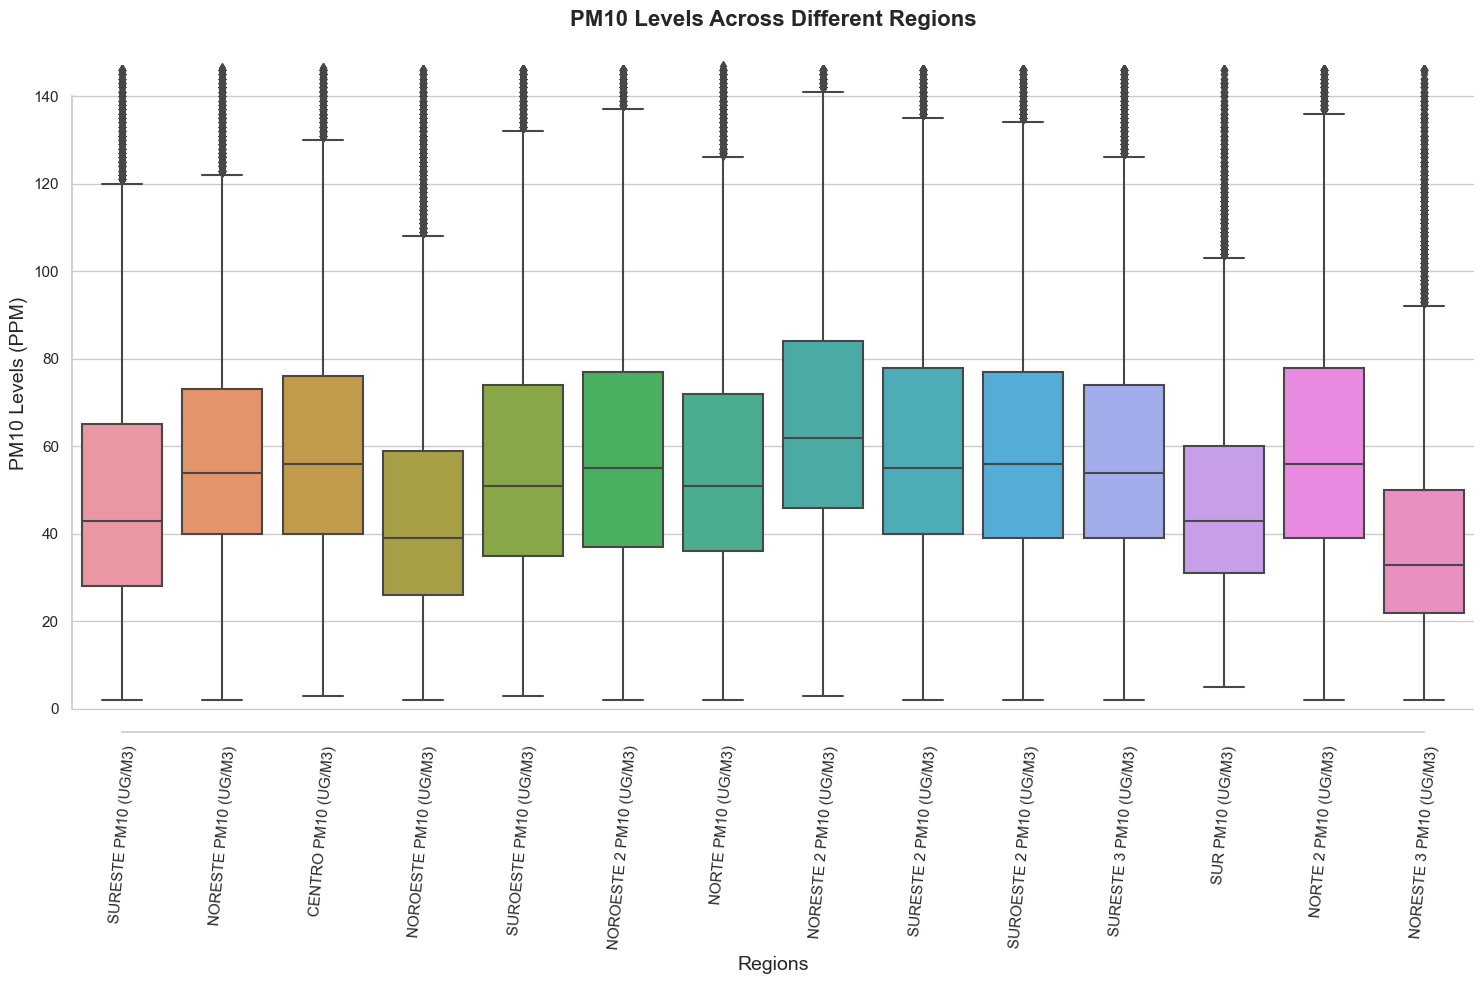

In [29]:
CO_columns = df_time_serie_2022.filter(regex=rf"\bPM10\b").columns.tolist()
sns.set(style="whitegrid", palette="muted")
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_time_serie_2022[CO_columns], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
ax.set_title("PM10 Levels Across Different Regions", fontsize=16, weight='bold')
ax.set_ylabel("PM10 Levels (PPM)", fontsize=14)
ax.set_xlabel("Regions", fontsize=14)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("PM10_levels.png", dpi = 400)
plt.show


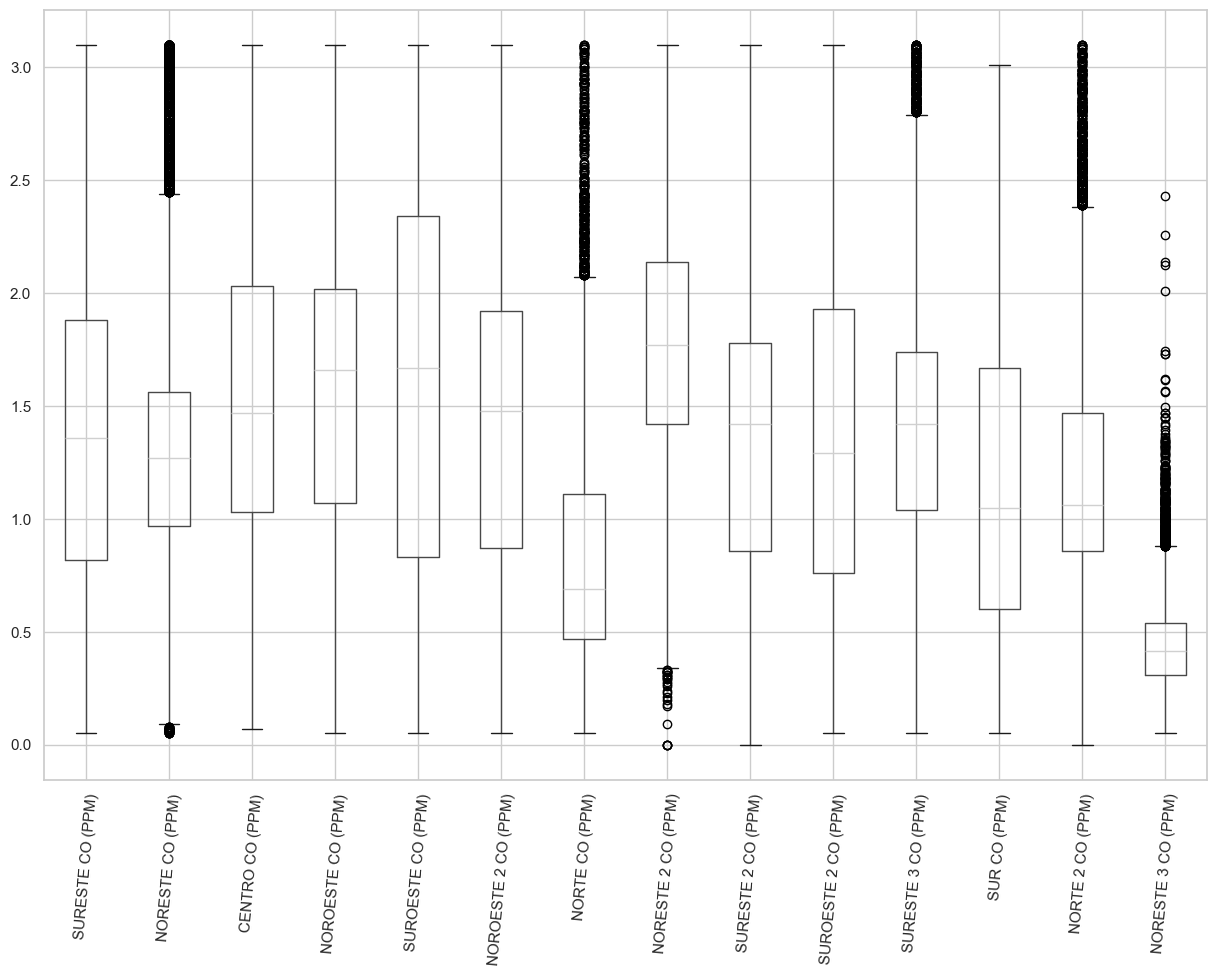

In [30]:
# Boxplots
CO_columns = df_time_serie_2022.filter(regex=rf"\bCO\b").columns.tolist()
df_time_serie_2022.boxplot(column=CO_columns, figsize=(15, 10), rot=85)
plt.show()

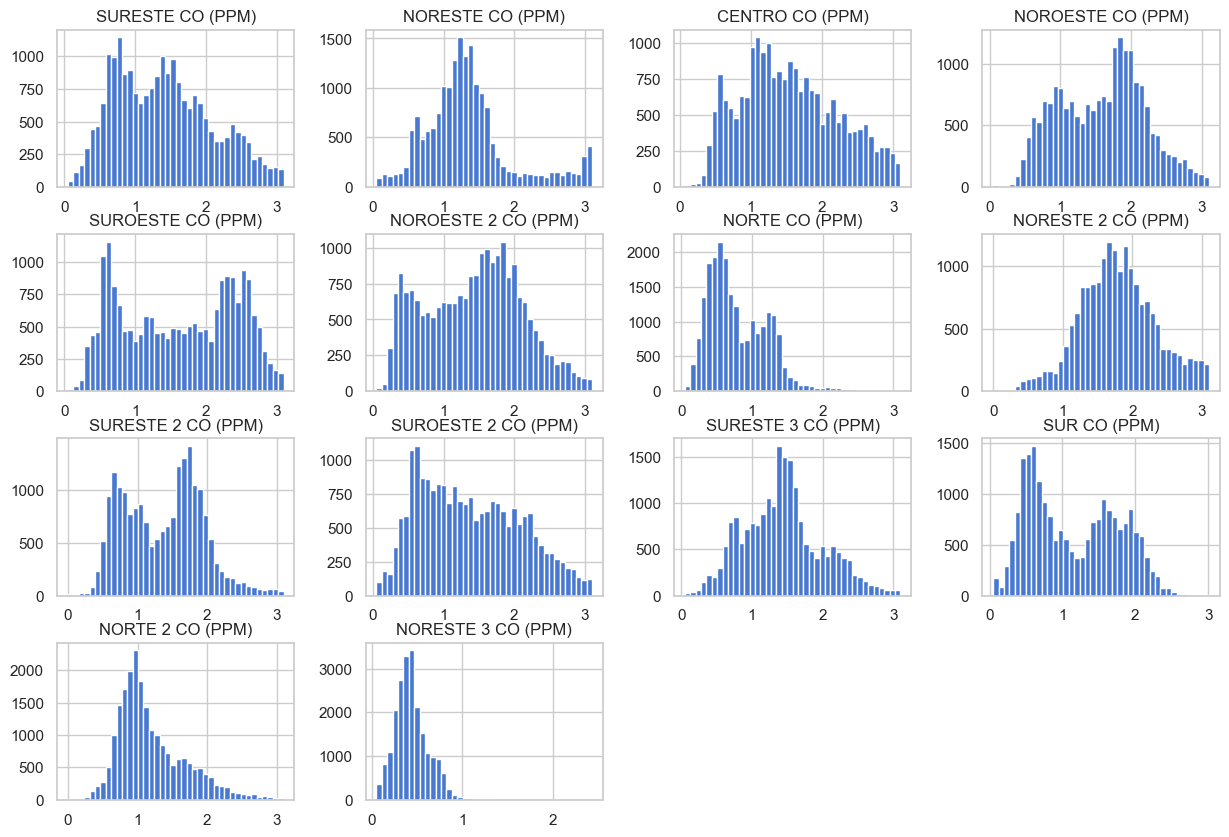

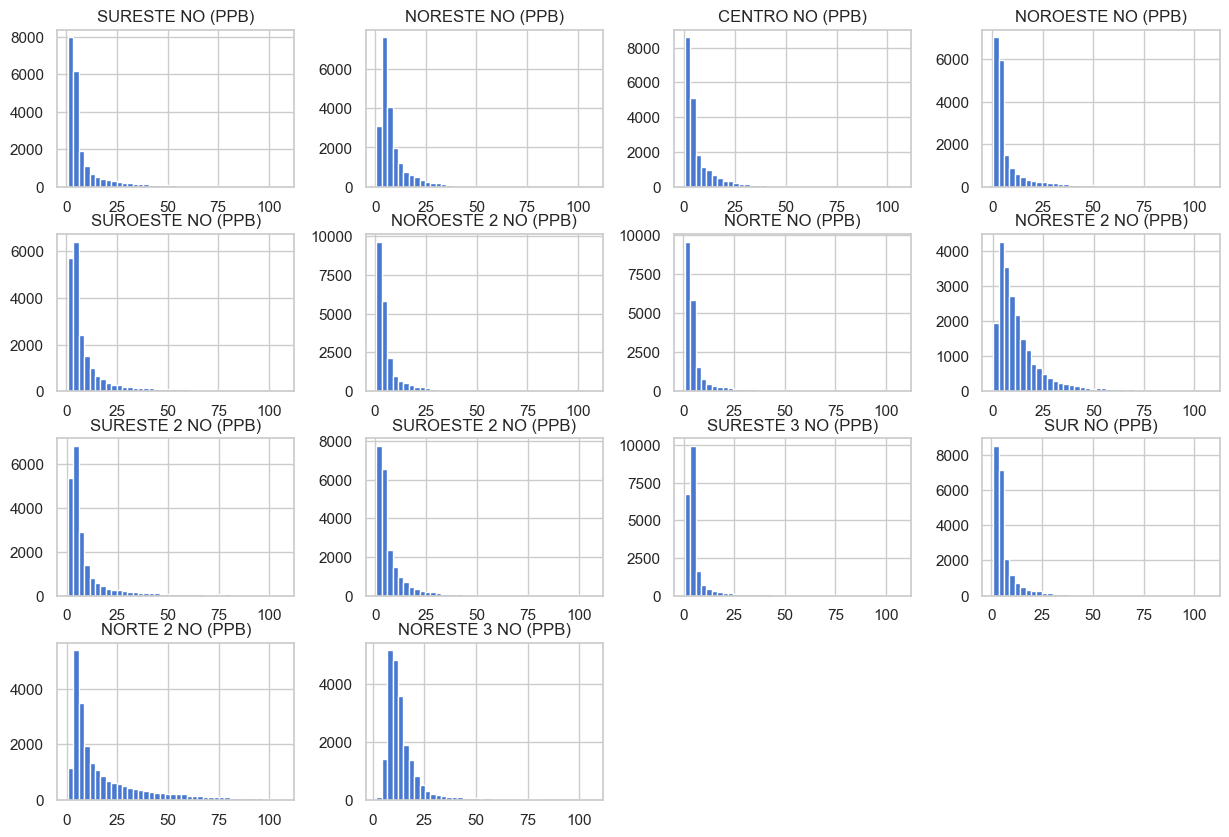

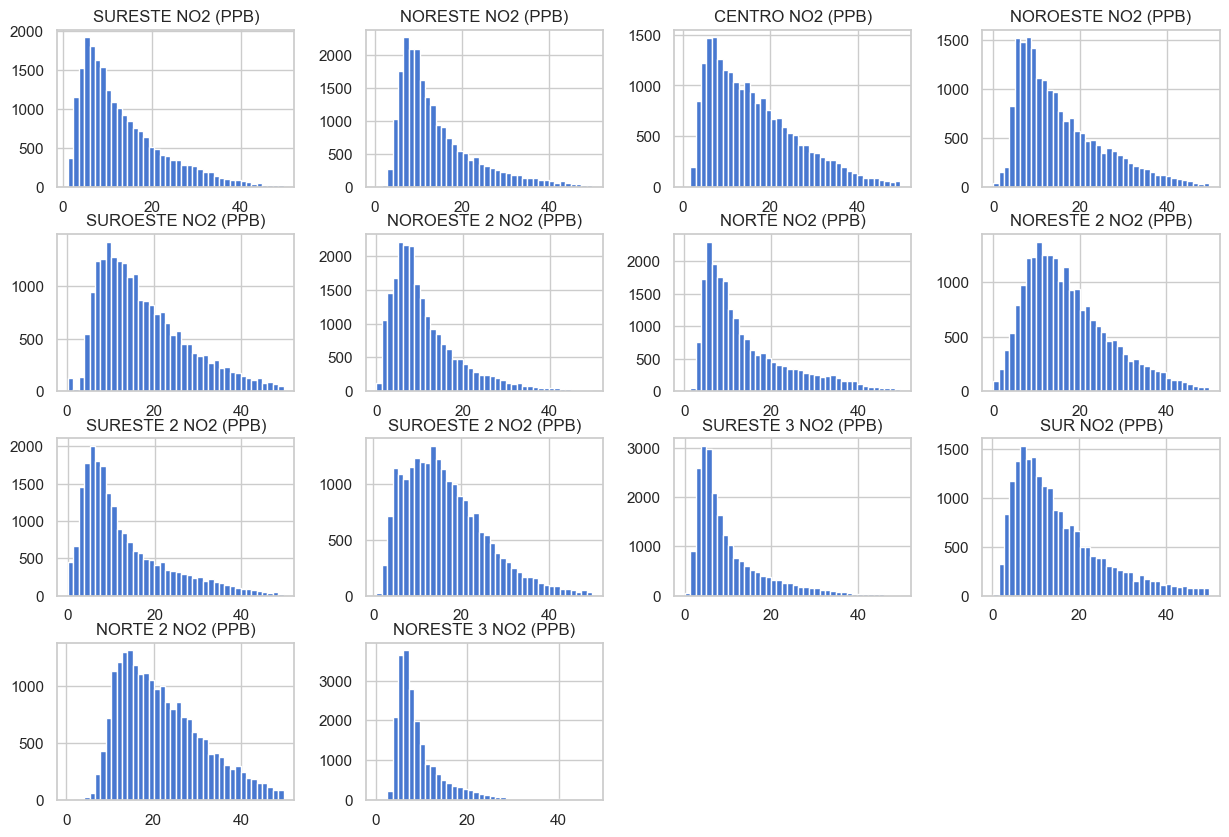

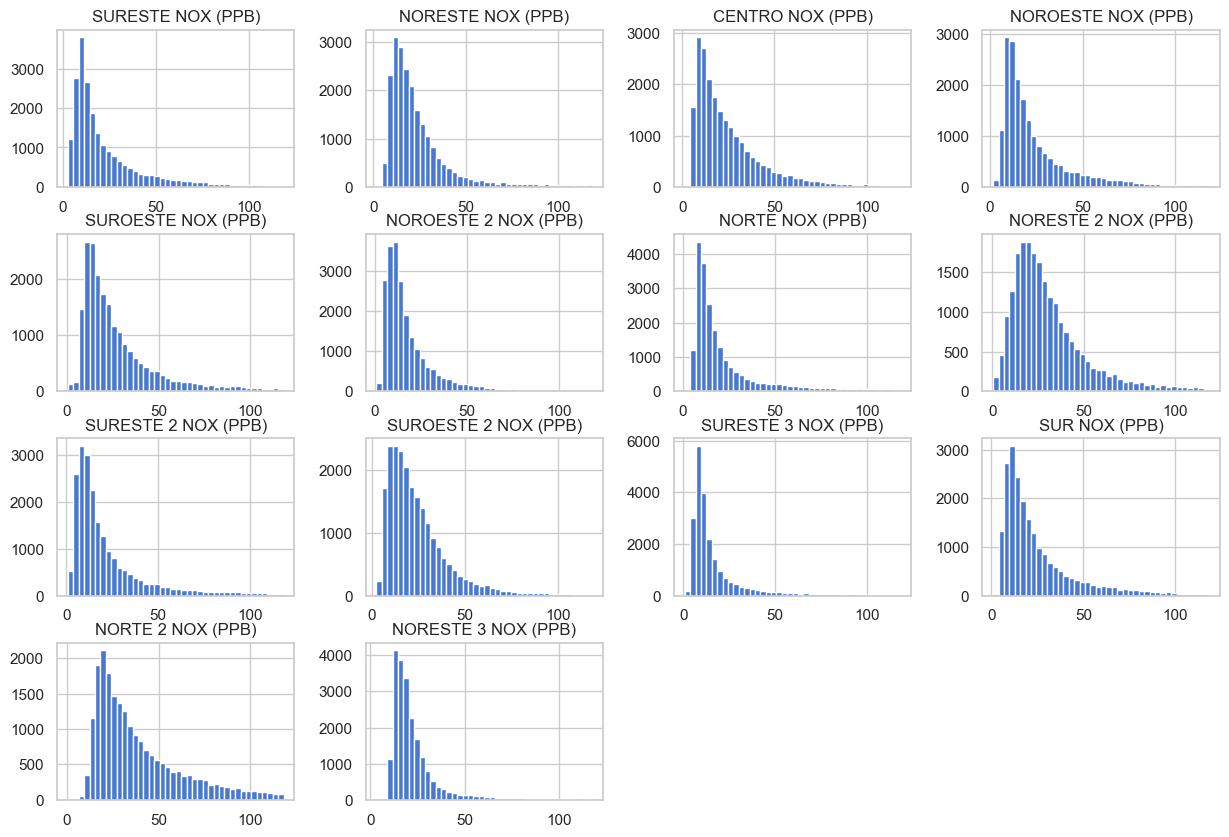

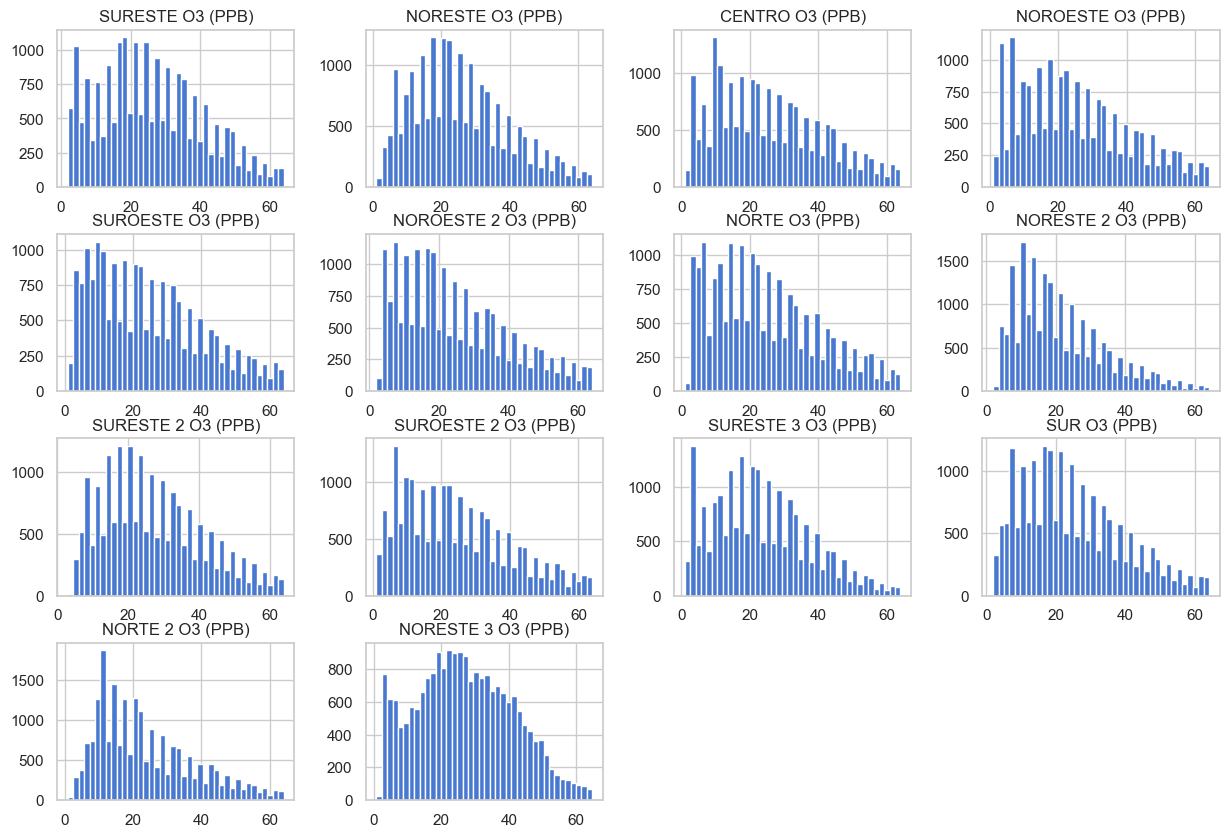

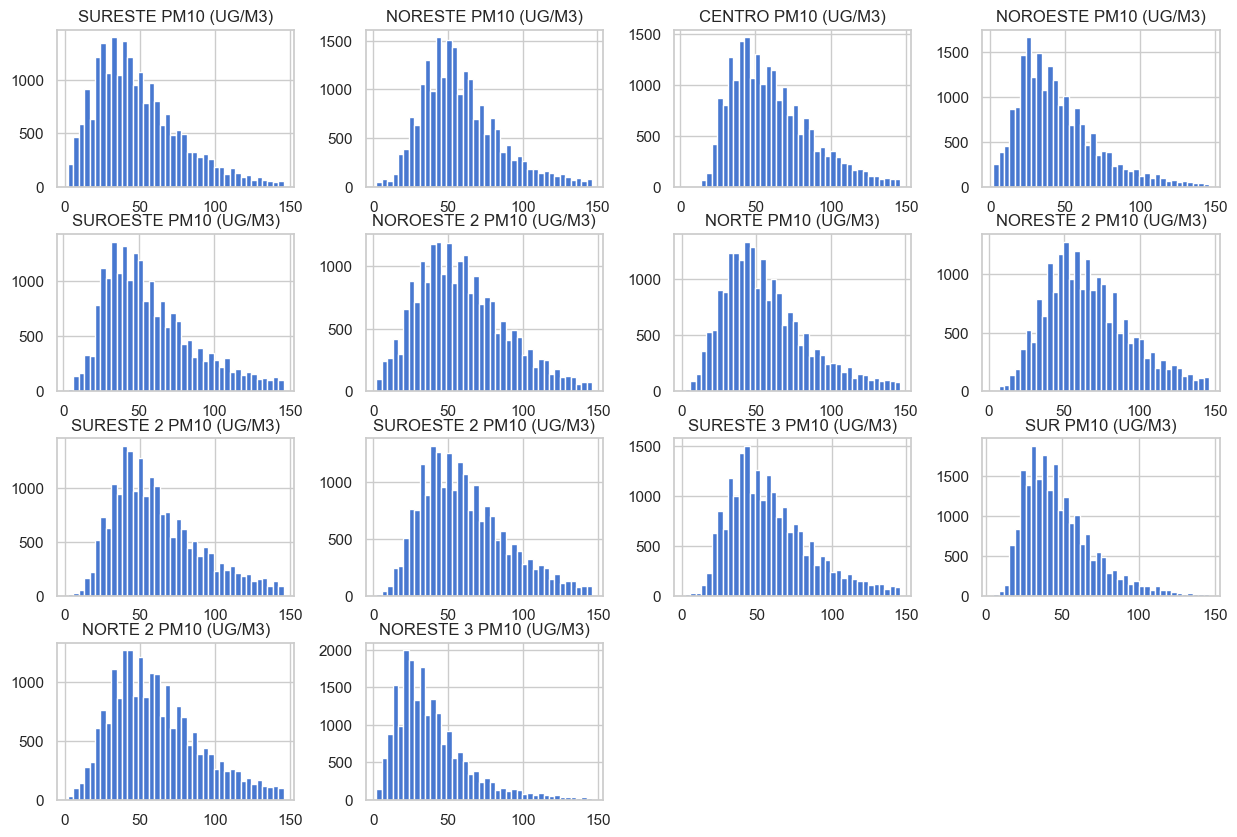

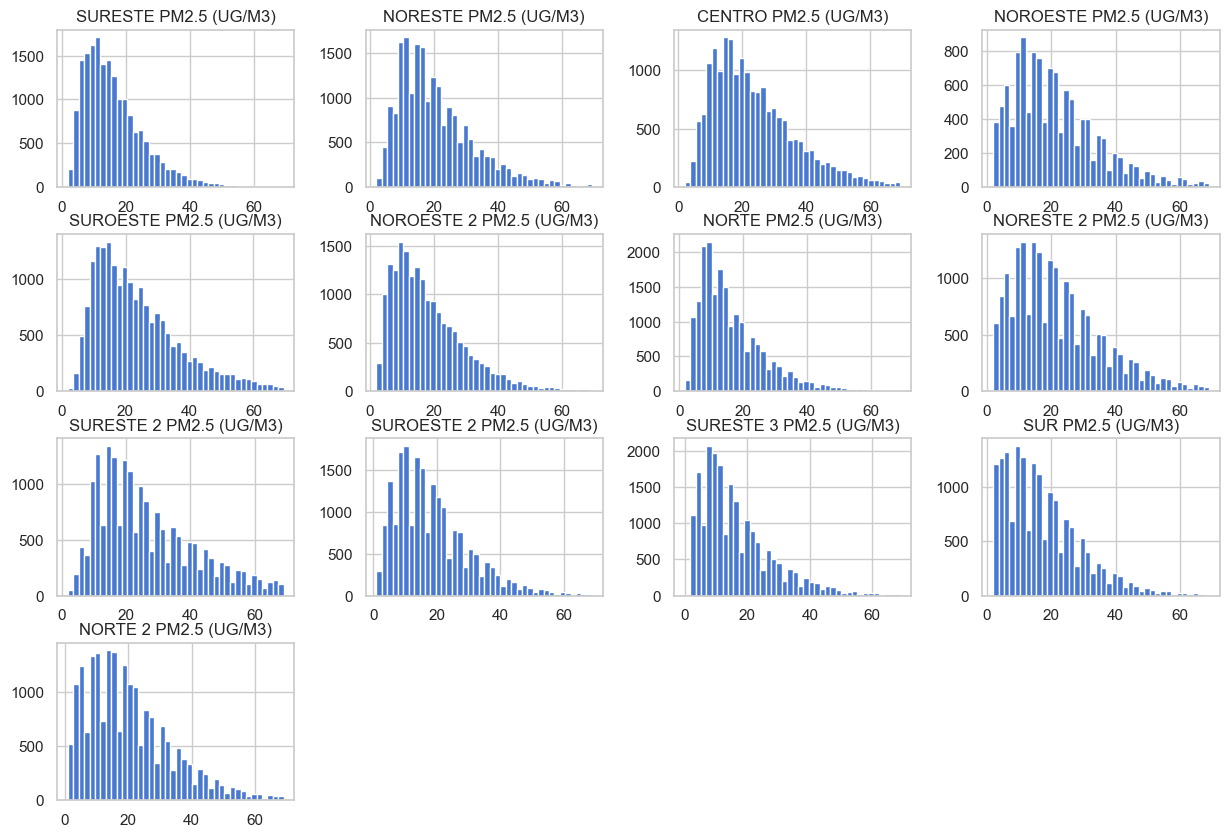

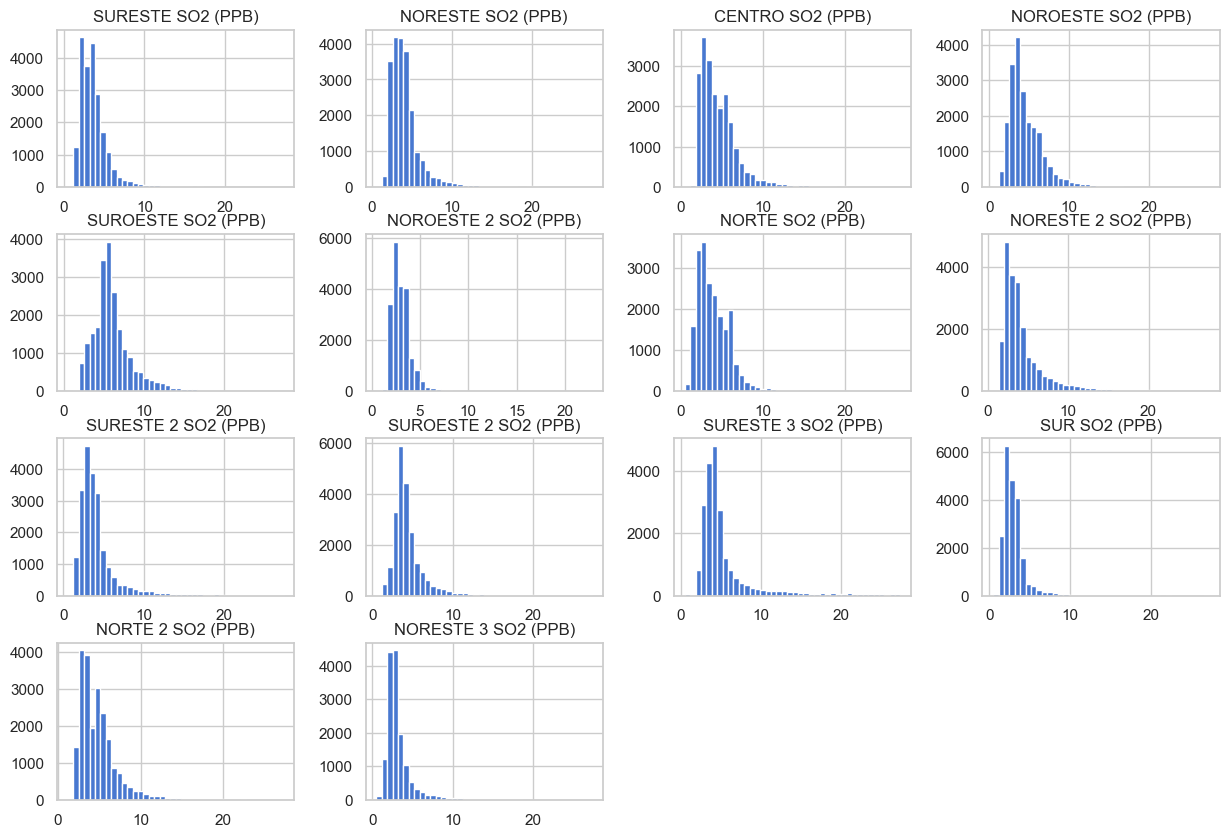

In [31]:
# Se hace un histograma por contaminante agrupado por estación
for contaminante in contaminantes:
    fig, ax = plt.subplots(figsize=(15, 10))
    df_time_serie_2022.filter(regex=rf"\b{contaminante}\b").hist(ax=ax, bins=40)
    plt.title(contaminante)
    plt.savefig(f"{contaminante}_histogram.png", dpi = 400)
    plt.show()

In [32]:
estaciones = ['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NORTE', 'SUR']

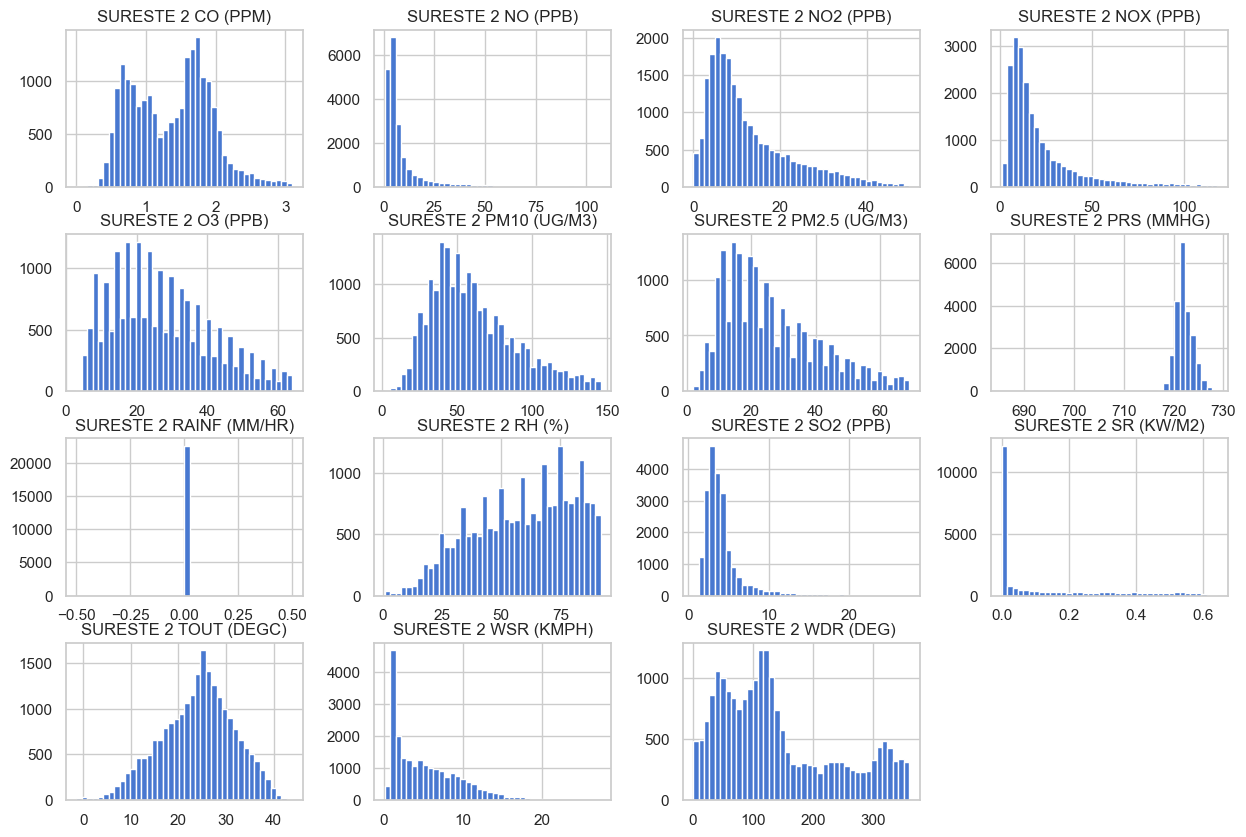

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
# Quitar la palabra 'SURESTE 2' de cada histograma individual

df_time_serie_2022.filter(regex=rf"\b{'SURESTE 2'}\b").hist(ax=ax, bins=40)
plt.title('SURESTE 2')
plt.savefig(f"{'SURESTE 2'}_histogram.png", dpi = 400)
plt.show()

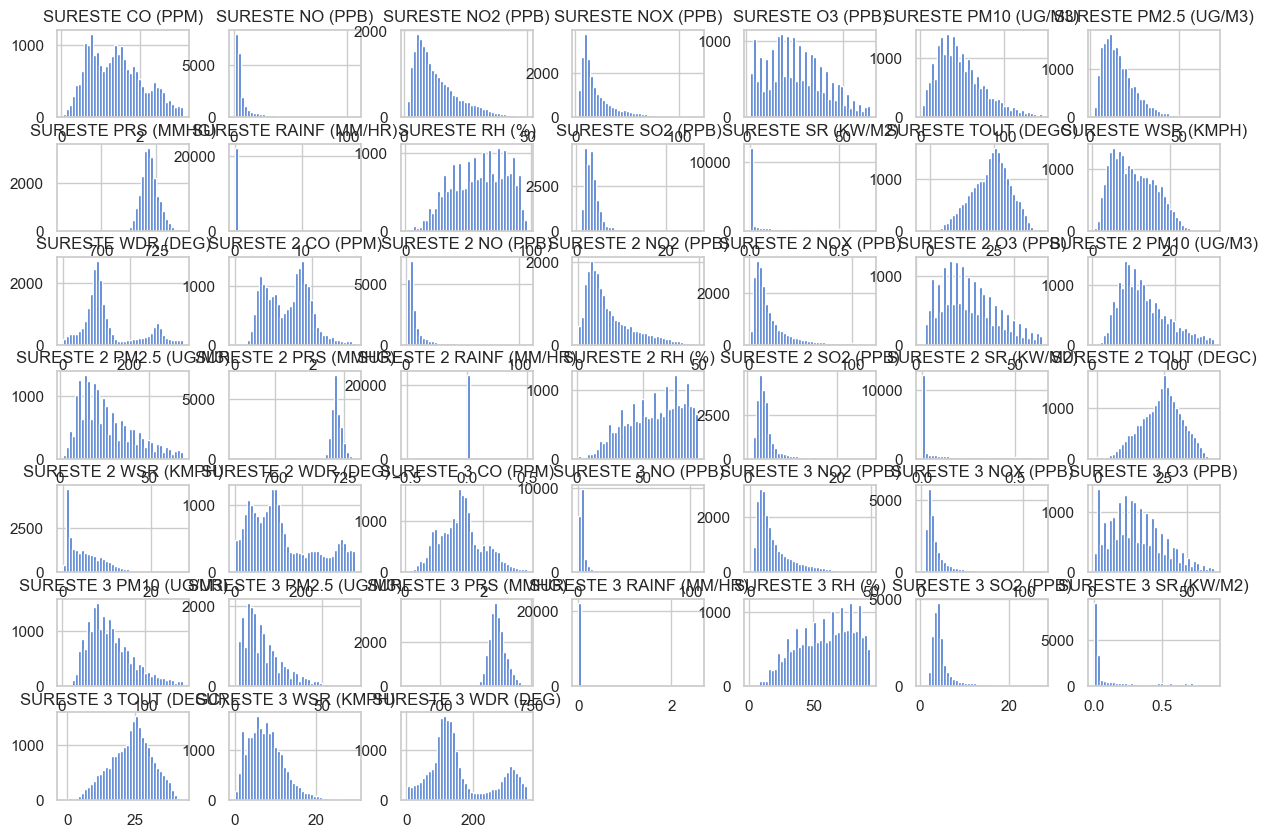

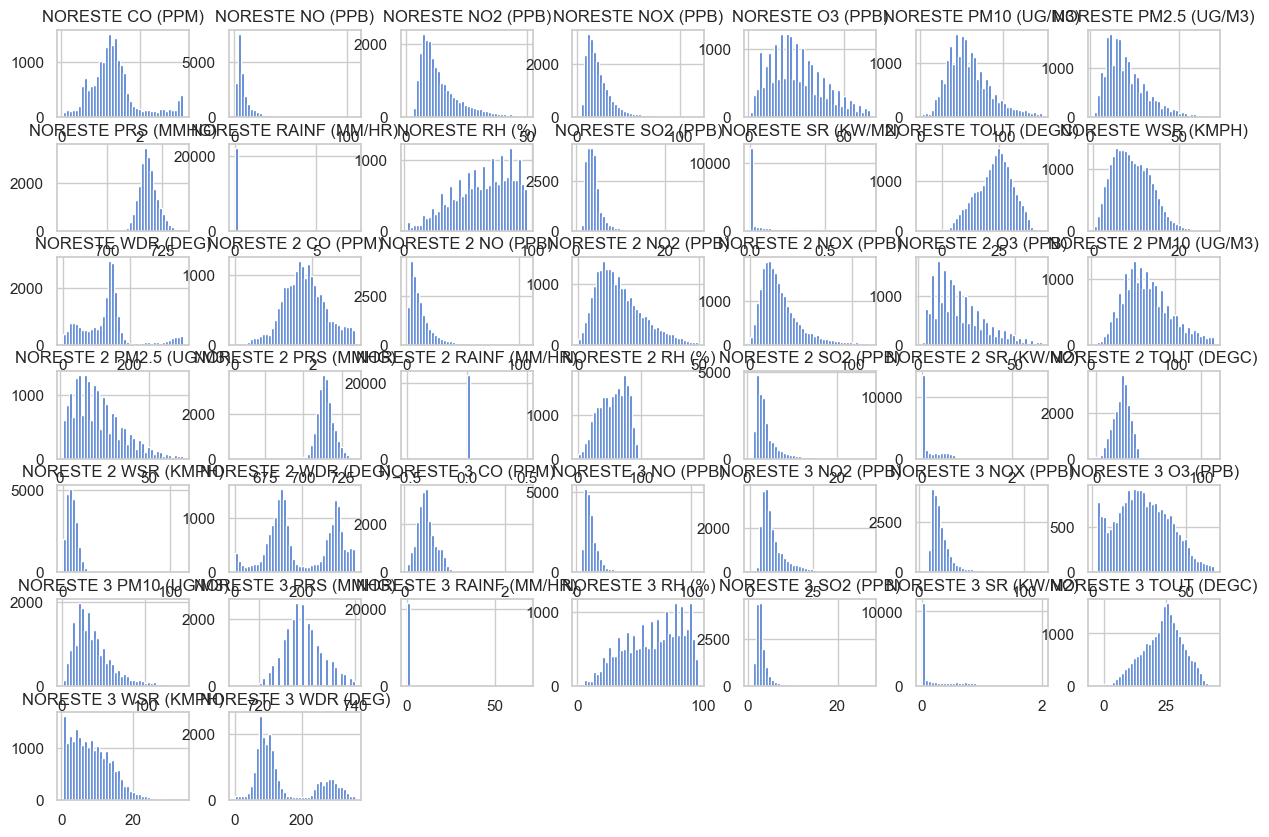

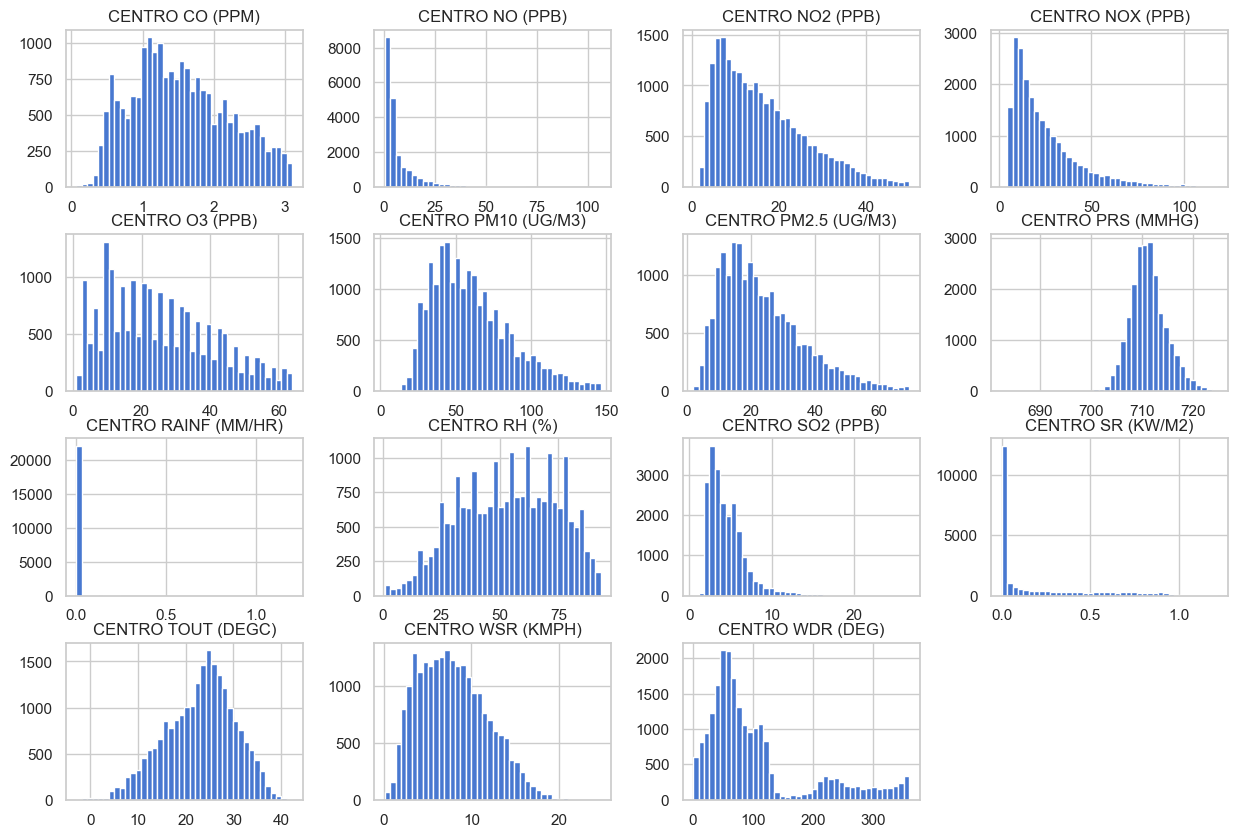

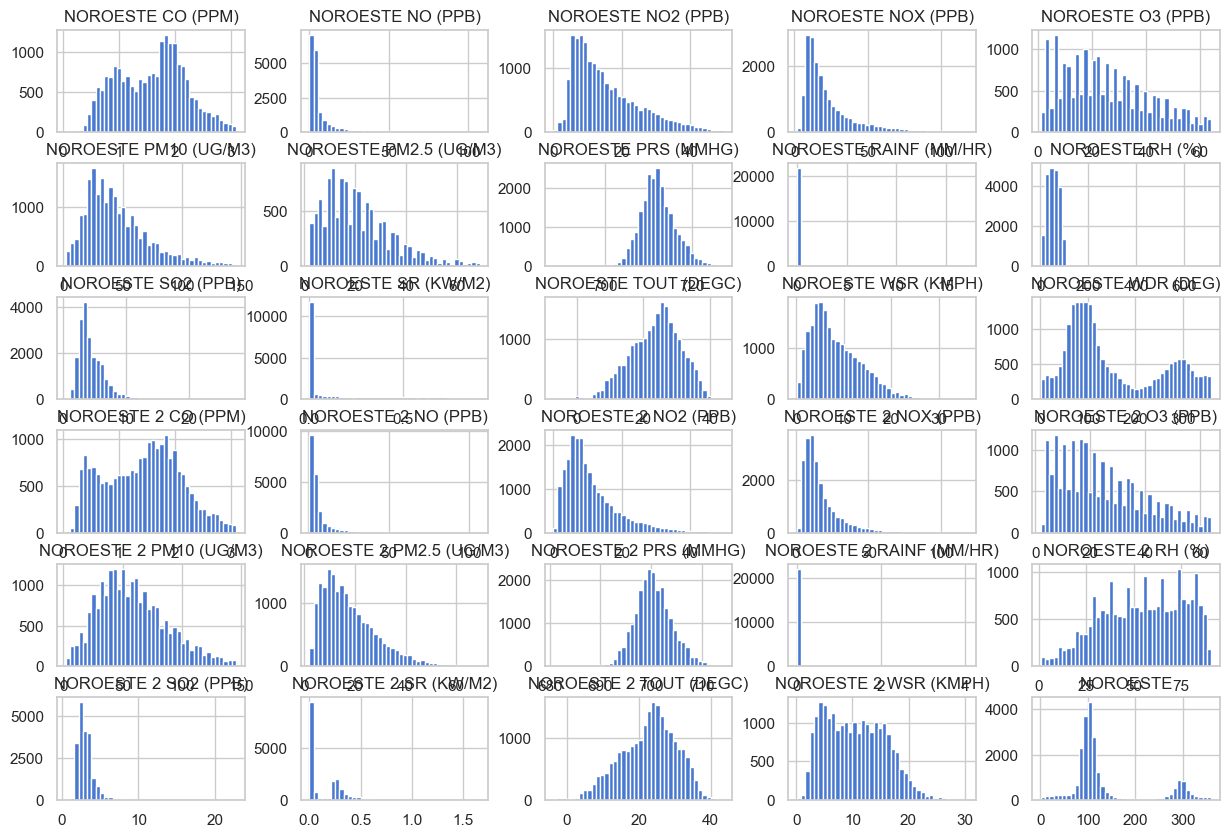

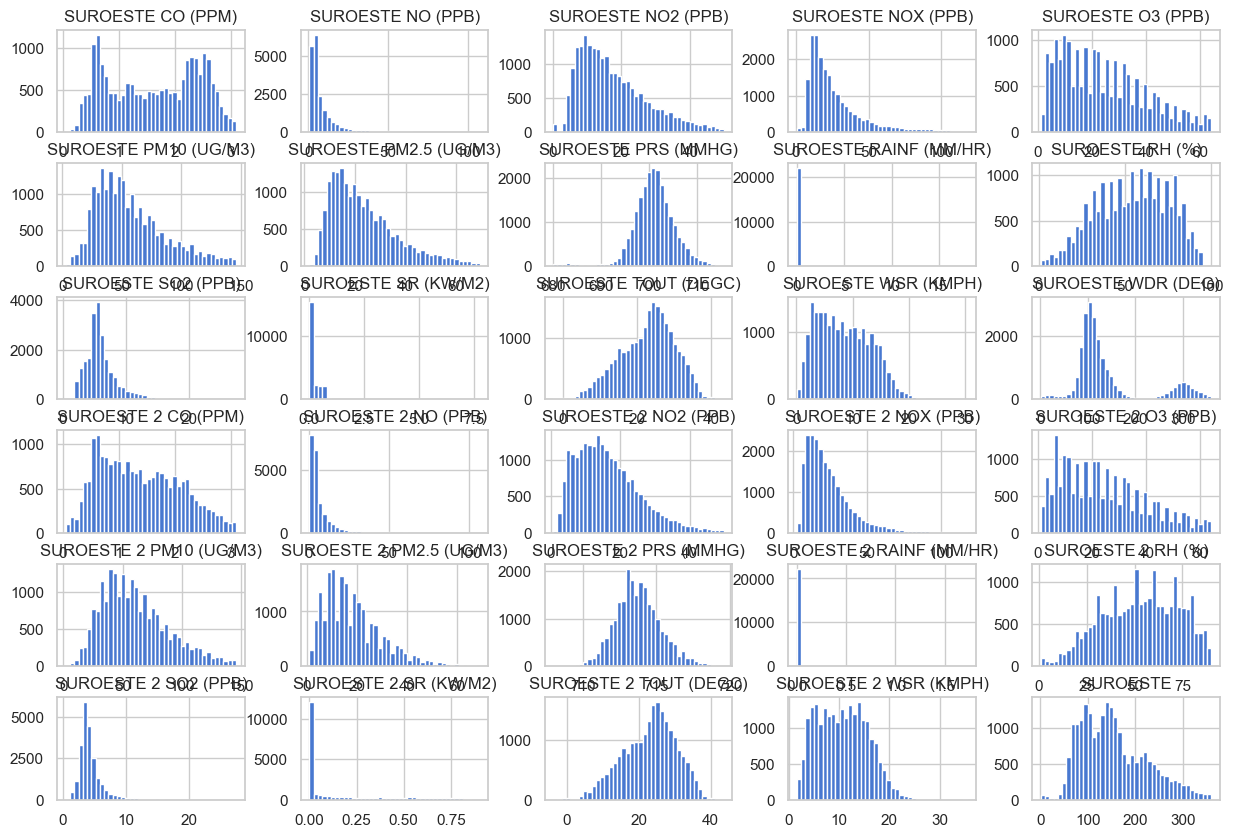

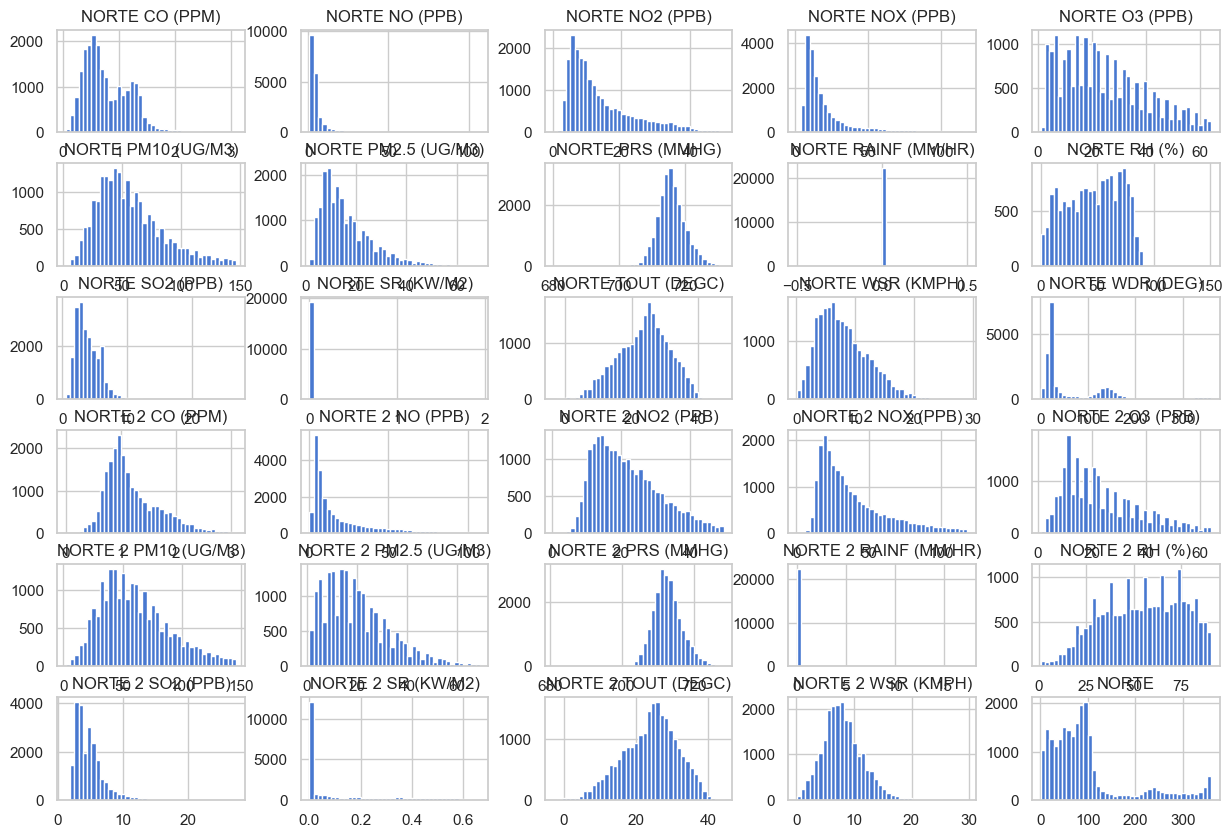

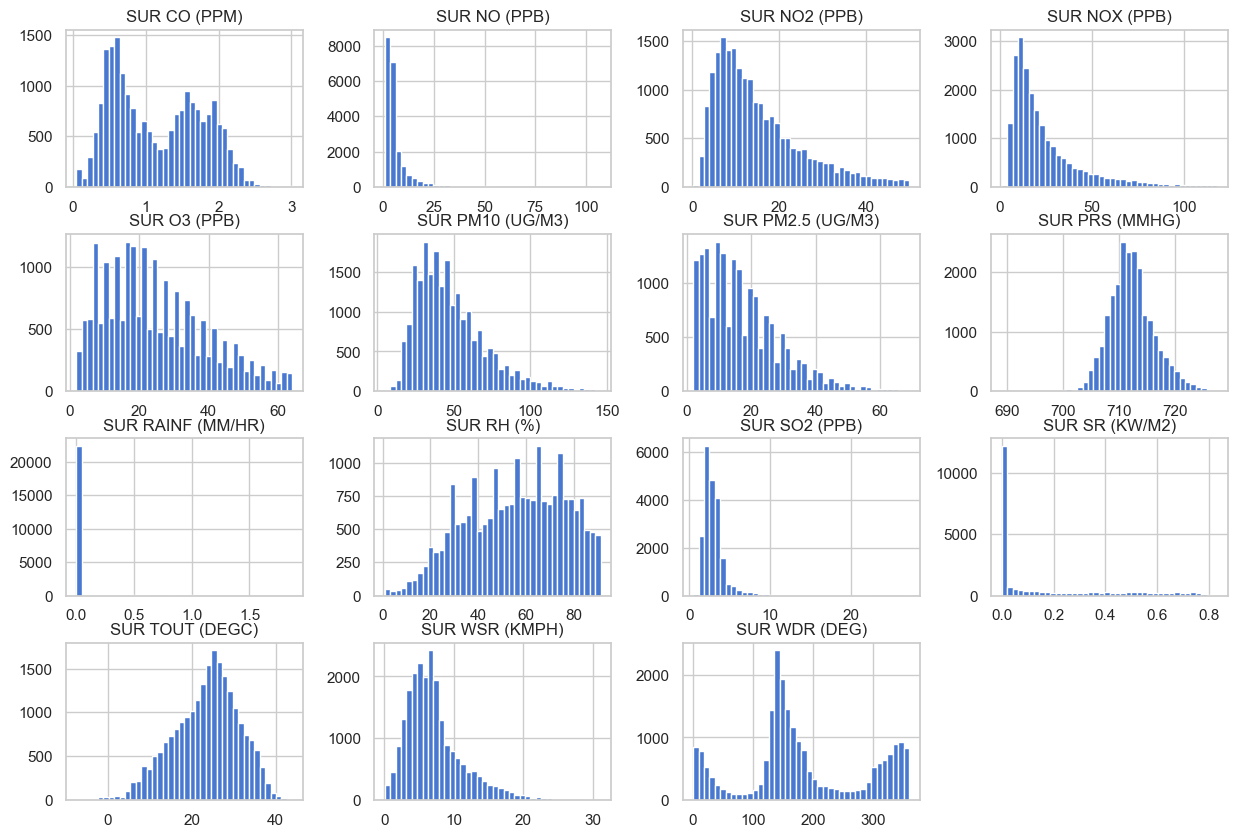

In [34]:
# Se hace un histograma por contaminante agrupado por estación
for estacion in estaciones:
    fig, ax = plt.subplots(figsize=(15, 10))
    df_time_serie_2022.filter(regex=rf"\b{estacion}\b").hist(ax=ax, bins=40)
    plt.title(estacion)
    plt.savefig(f"{estacion}_histogram.png", dpi = 400)
    plt.show()

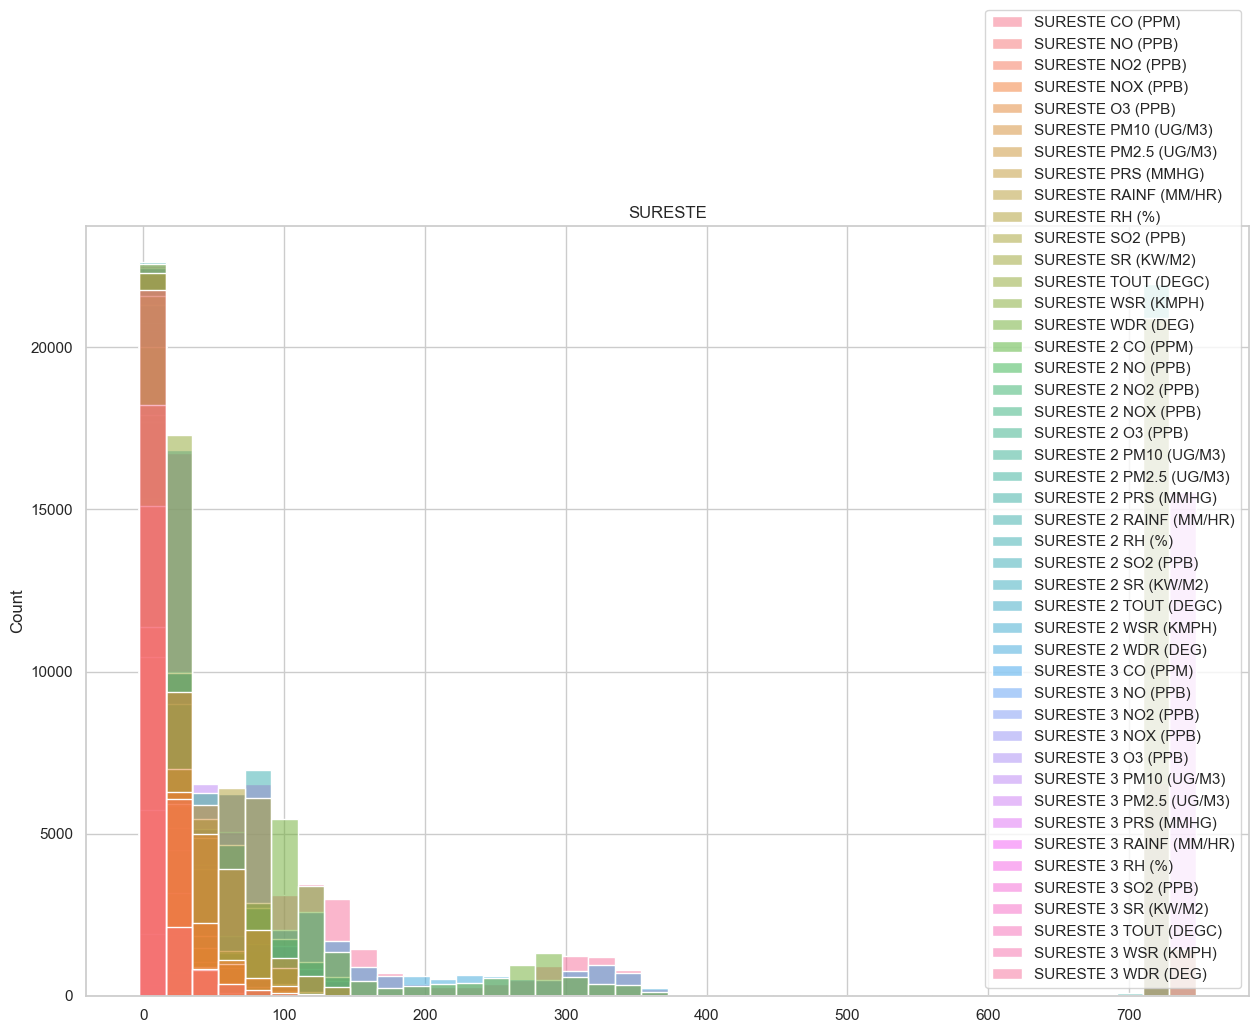

In [35]:
#Obtener un histograma de los contaminantes en cada estación
plt.figure(figsize=(15, 10))
sns.histplot(data=df_time_serie_2022.filter(regex=rf"\bSURESTE\b"), bins=40)
plt.title("SURESTE")
plt.show()

# Heat map

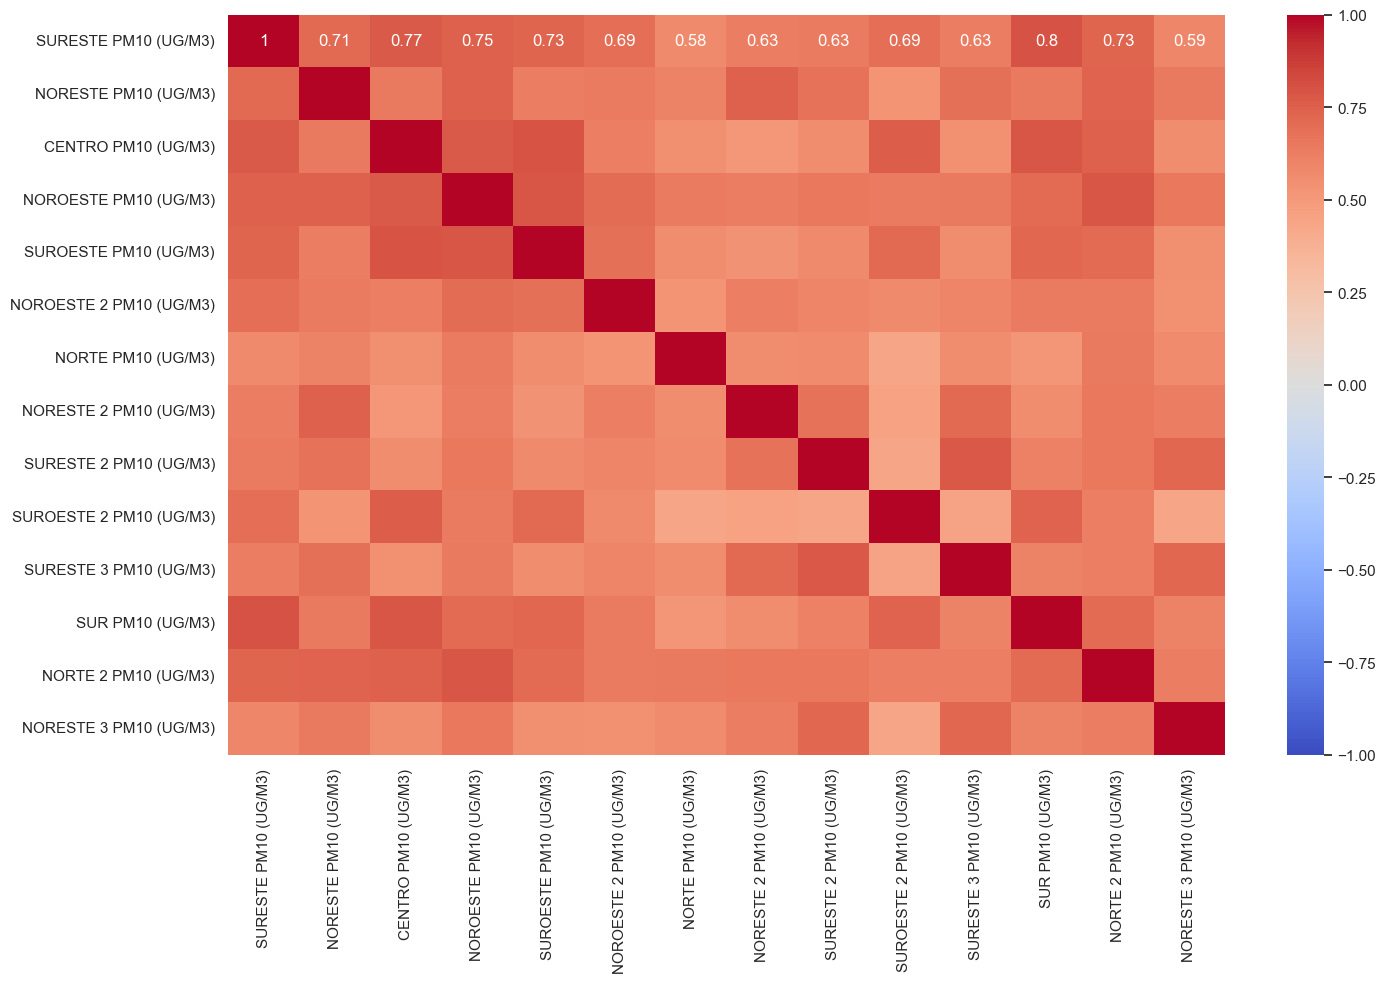

In [36]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_time_serie_2022.filter(regex=rf"\bPM10\b").corr('spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.savefig("PM2.5_heatmap.png", dpi = 400)
plt.show()

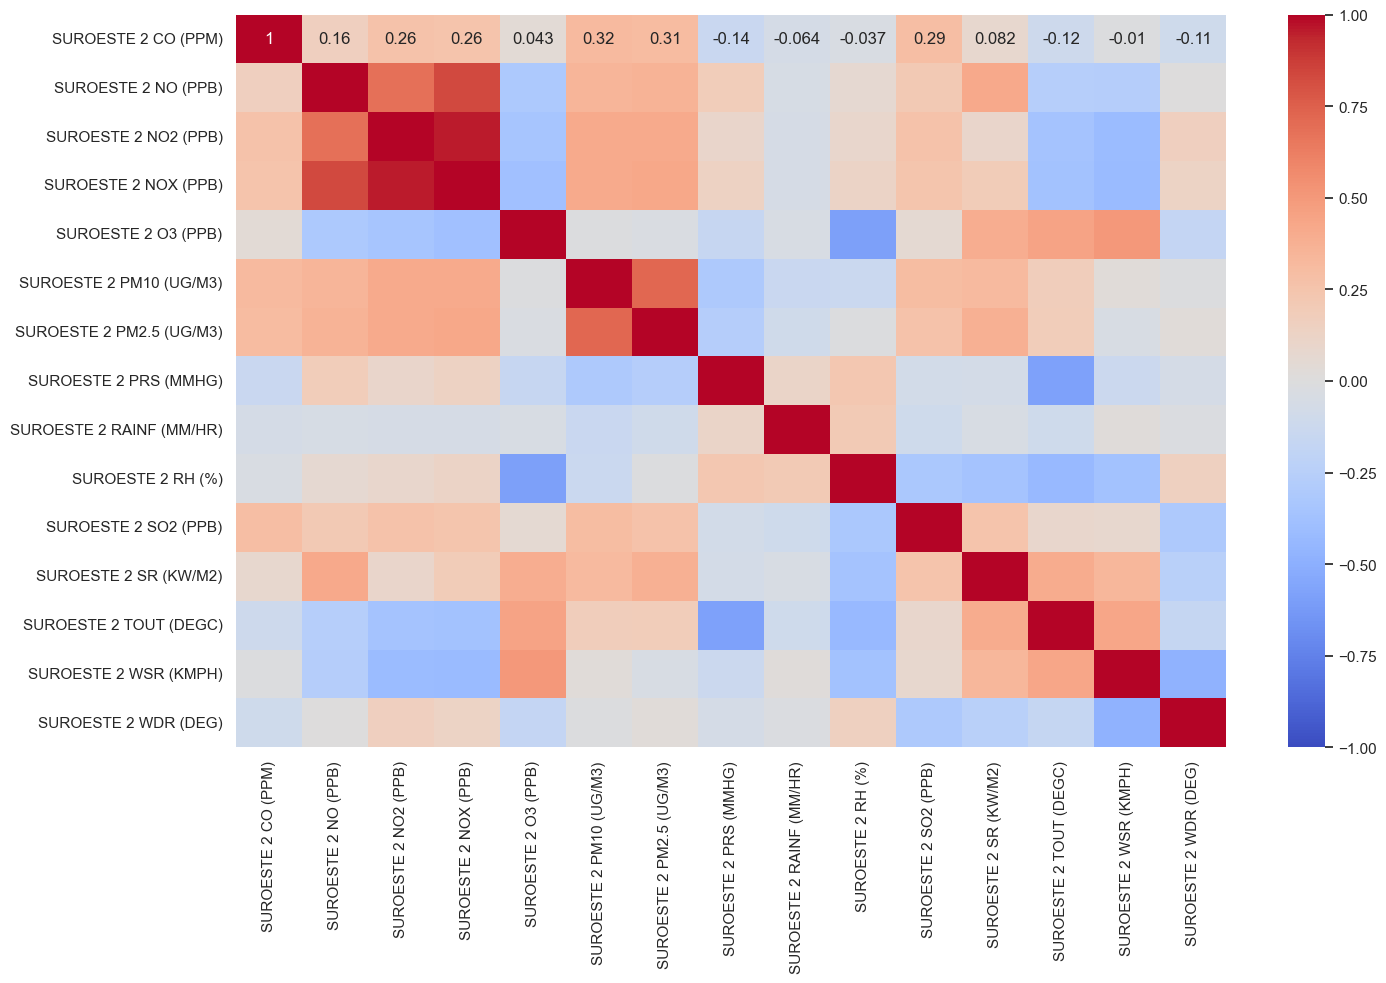

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_time_serie_2022.filter(regex="SUROESTE 2").corr('spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.savefig("PM2.5_heatmap.png", dpi = 400)
plt.show()

In [38]:
# Create the entry filled with NaNs
df_time_serie_2022.loc['2023-02-11 19:00:00'] = np.nan
df_time_serie_2022.loc['2023-10-31 17:00:00'] = np.nan
#Set the index to datetime
df_time_serie_2022.index = pd.to_datetime(df_time_serie_2022.index) 
# Mes
df_time_serie_2022["Mes"] = df_time_serie_2022.index.month
#Day of year
df_time_serie_2022["Dia"] = df_time_serie_2022.index.dayofyear
#Hour
df_time_serie_2022["Hora"] = df_time_serie_2022.index.hour

In [39]:
df_time_series_2022 = df_time_serie_2022.asfreq('h',fill_value=np.nan)

In [40]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights="distance")
df_time_serie_2022_nonans = imputer.fit_transform(df_time_serie_2022)



In [41]:
# Transform the numpy array back to a DataFrame with the same columns

df_time_serie_2022_nonans = pd.DataFrame(df_time_serie_2022_nonans, columns=df_time_serie_2022.columns, index=df_time_serie_2022.index)

In [42]:
df_time_serie_2022_nonans.to_csv("df_time_serie_2022.csv")